In [5]:
import pandas

data = pandas.read_csv('Crime_Data_from_2010_to_Present.csv')

In [6]:
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [9]:
# get related data

df = data[['Date Occurred', 'Time Occurred']]
df.head()

,Date Occurred,Time Occurred
0,03/11/2013,1800
1,01/22/2010,2300
2,03/18/2013,2030
3,11/10/2010,1800
4,01/04/2014,2300


In [11]:
from collections import Counter

time_cnt = Counter()

for index, row in df.iterrows():
    t = row['Time Occurred'] 
    h = int(t) / 100
    time_cnt[h] += 1

print time_cnt

Counter({12: 135068, 18: 100645, 20: 97323, 19: 95534, 17: 93435, 21: 91385, 22: 88216, 15: 87744, 16: 86589, 14: 80651, 23: 77731, 13: 72772, 8: 71584, 10: 71418, 0: 69332, 11: 67365, 9: 63365, 1: 48185, 7: 42592, 2: 40726, 3: 29917, 6: 28648, 4: 22551, 5: 20533})


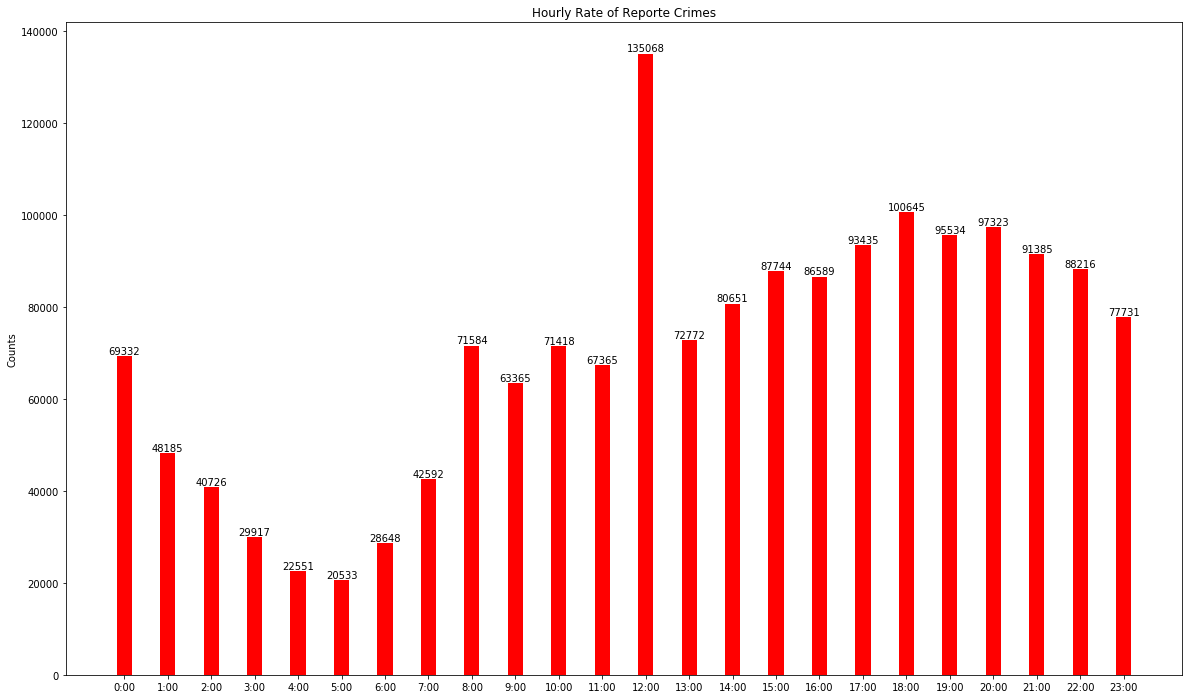

In [31]:
import numpy as np
import matplotlib.pyplot as plt

time_sorted_counts = []
for i in xrange(24):
    time_sorted_counts.append(time_cnt[i])

ind = np.arange(24)  # the x locations for the groups
width = 0.35       # the width of the bars
hour_labels = [ '{0}:00'.format(x) for x in xrange(24) ]

fig, ax = plt.subplots(figsize=(20, 12))
rects1 = ax.bar(ind, time_sorted_counts, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Hourly Rate of Reported Crimes')
ax.set_xticks(ind)
ax.set_xticklabels(hour_labels)

# ax.legend((rects1[0], 'Men'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+20,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.savefig('hourly_rate.jpg')
plt.show()

In [69]:
from collections import Counter
import datetime

weekly_cnt = Counter()
yearly_cnt = Counter()
daily_cnt = Counter()

for index, row in df.iterrows():
    date = row['Date Occurred'] 
    m, d, y = date.split('/')
    week_num = datetime.date(int(y), int(m), int(d)).weekday()
    date_num = datetime.date(int(y), int(m), int(d)).timetuple().tm_yday
    weekly_cnt[week_num] += 1
    yearly_cnt[int(y)] += 1
    daily_cnt[date_num] += 1

print weekly_cnt

Counter({4: 259729, 5: 242043, 0: 239881, 2: 238315, 3: 236632, 1: 235817, 6: 230892})


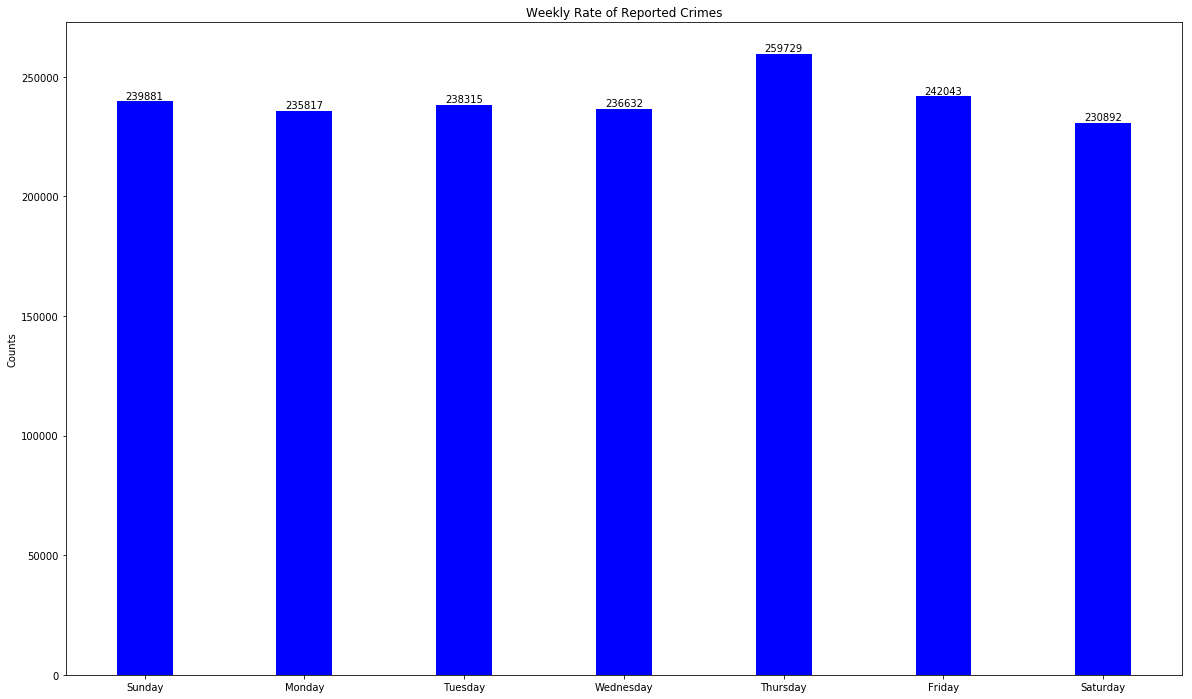

In [57]:
import numpy as np
import matplotlib.pyplot as plt

weekly_sorted_counts = []
for i in xrange(7):
    weekly_sorted_counts.append(weekly_cnt[i])

ind = np.arange(7)  # the x locations for the groups
width = 0.35       # the width of the bars
week_labels = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' ]

fig, ax = plt.subplots(figsize=(20, 12))
rects1 = ax.bar(ind, weekly_sorted_counts, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Weekly Rate of Reported Crimes')
ax.set_xticks(ind)
ax.set_xticklabels(week_labels)

# ax.legend((rects1[0], 'Men'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+20,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.savefig('weekly_rate.jpg')
plt.show()

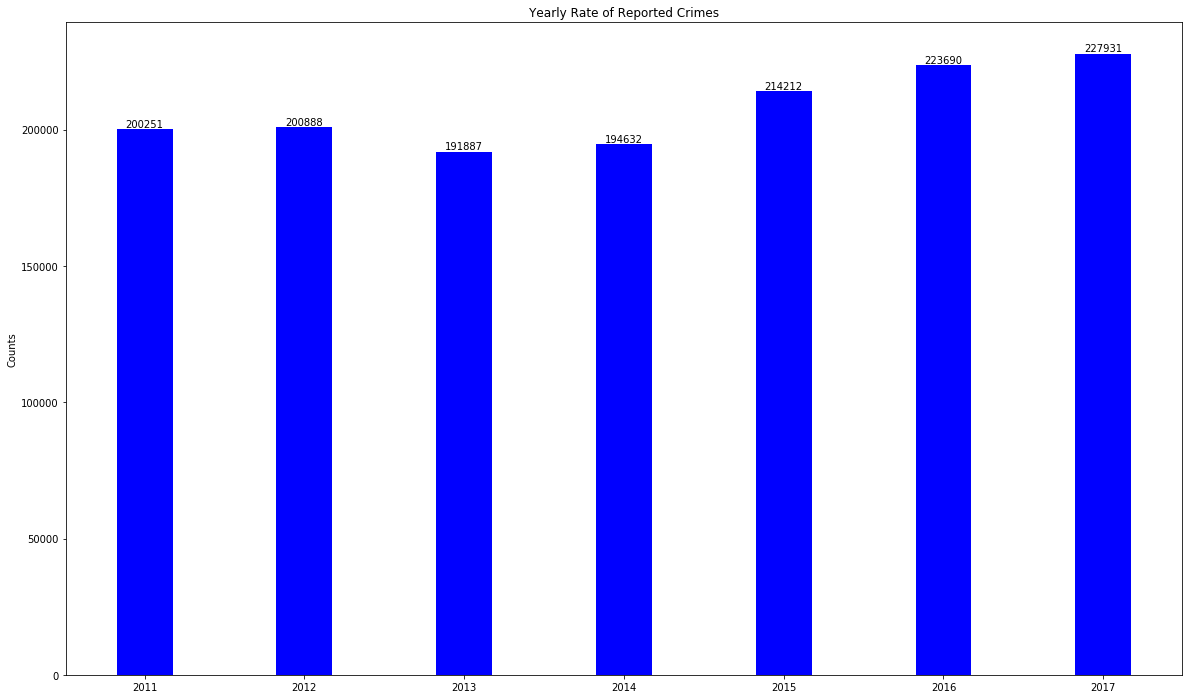

In [65]:
import numpy as np
import matplotlib.pyplot as plt

yearly_sorted_counts = []
for i in xrange(2011, 2018):
    yearly_sorted_counts.append(yearly_cnt[i])

ind = np.arange(7)  # the x locations for the groups
width = 0.35       # the width of the bars
yearly_lables = [ 2011+x for x in xrange(7) ]

fig, ax = plt.subplots(figsize=(20, 12))
rects1 = ax.bar(ind, yearly_sorted_counts, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Yearly Rate of Reported Crimes')
ax.set_xticks(ind)
ax.set_xticklabels(yearly_lables)

# ax.legend((rects1[0], 'Men'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+20,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.savefig('yearly_rate.jpg')
plt.show()

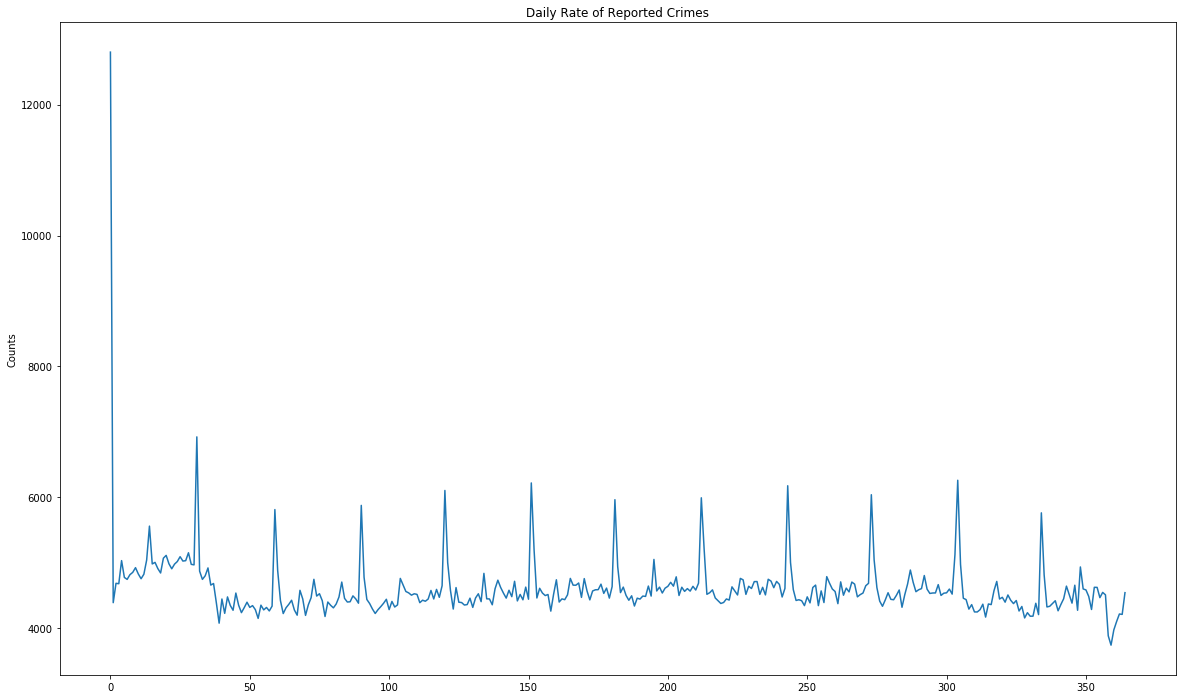

In [77]:
import numpy as np
import matplotlib.pyplot as plt

daily_sorted_counts = []
for i in xrange(1,366):
    daily_sorted_counts.append(daily_cnt[i])

ind = np.arange(366)  # the x locations for the groups
width = 0.35       # the width of the bars
day_lables = np.arange(366)

fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(daily_sorted_counts)
# rects1 = ax.bar(ind, daily_sorted_counts, width, color='b')

# # add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Daily Rate of Reported Crimes')
# ax.set_xticks(ind)
# ax.set_xticklabels(day_lables)

# ax.legend((rects1[0], 'Men'))

# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., height+20,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)

plt.savefig('daily_rate.jpg')
plt.show()

In [68]:
datetime.date(2018, 2, 10).timetuple().tm_yday

41

In [71]:
len(daily_sorted_counts)

7